<a href="https://colab.research.google.com/github/piercepatrick/Football-Position-Classification/blob/master/Cleaning_%26_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Read in all dataframes
atlanta = pd.read_csv('/content/drive/My Drive/DS/Football Position Classifier/Data/atlanta_combine_results.csv')
baltimore = pd.read_csv('/content/drive/My Drive/DS/Football Position Classifier/Data/baltimore_combine_results.csv')
charlotte = pd.read_csv('/content/drive/My Drive/DS/Football Position Classifier/Data/charlotte_combine_results.csv')
chicago = pd.read_csv('/content/drive/My Drive/DS/Football Position Classifier/Data/chicago_combine_results.csv')
dallas = pd.read_csv('/content/drive/My Drive/DS/Football Position Classifier/Data/dallas_combine_results.csv')
mobile = pd.read_csv('/content/drive/My Drive/DS/Football Position Classifier/Data/mobile_combine_results.csv')
nashville = pd.read_csv('/content/drive/My Drive/DS/Football Position Classifier/Data/nashville_combine_results.csv')
newjersey = pd.read_csv('/content/drive/My Drive/DS/Football Position Classifier/Data/newjersey_combine_results.csv')
orlando = pd.read_csv('/content/drive/My Drive/DS/Football Position Classifier/Data/orlando_combine_results.csv')
sanfrancisco = pd.read_csv('/content/drive/My Drive/DS/Football Position Classifier/Data/sanfrancisco_combine_results.csv')

In [4]:
# Print row counts for each df
for df in [atlanta, baltimore, charlotte, chicago, dallas, mobile, nashville, newjersey]:
  print(df.shape)

(2070, 15)
(1737, 15)
(1995, 15)
(1251, 15)
(1557, 15)
(1069, 15)
(1230, 15)
(1555, 15)


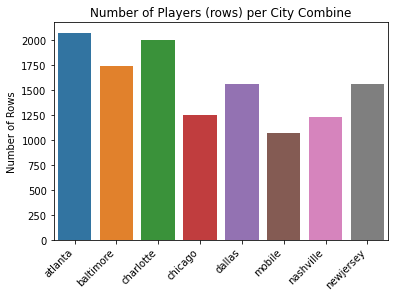

In [5]:
# Visualize player counts at each city combine
df_dict = {'atlanta': 2070 , 'baltimore': 1737, 'charlotte': 1995, 'chicago': 1251, 'dallas': 1557, 'mobile': 1069, 'nashville': 1230, 'newjersey': 1555}
keys = list(df_dict.keys())
values = list(df_dict.values())
chart = sns.barplot(x=keys, y=values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, fontweight='light', horizontalalignment='right')
plt.ylabel('Number of Rows')
plt.title('Number of Players (rows) per City Combine')

plt.show()

In [6]:
# Combine all dataframes into one
df = pd.concat([atlanta, baltimore, charlotte, chicago, dallas, mobile, nashville, newjersey])
df.head()

,Unnamed: 0,first_name,last_name,state,grad_year,position,height,weight,forty_yard_dash,shuttle_run,three_cone,broad_jump,vertical_jump,profile_yn,conditions
0,0,Ali,Abdul-Barr,GA,2021.0,WR,6' 0,180.0,5.034,4.55,6.91,104.0,25.0,View Profile,warm and sunny
1,1,Noah,Abrams,GA,2021.0,CB,5' 8,149.0,4.565,4.614,7.65,107.0,27.7,View Profile,warm and sunny
2,2,Brian,Abson,GA,2020.0,RB,5' 7,184.0,NaN,NaN,NaN,NaN,NaN,View Profile,warm and sunny
3,3,Zak,Acuff,TN,2021.0,QB,"6'2""",156.0,5.009,4.937,NaN,115.0,NaN,View Profile,warm and sunny
4,4,Cedric,Adams,MS,2019.0,S,5' 8,178.0,4.952,4.789,7.81,106.0,27.6,View Profile,warm and sunny


In [7]:
df.shape

(12464, 15)

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.head(1)

,first_name,last_name,state,grad_year,position,height,weight,forty_yard_dash,shuttle_run,three_cone,broad_jump,vertical_jump,profile_yn,conditions
0,Ali,Abdul-Barr,GA,2021.0,WR,6' 0,180.0,5.034,4.55,6.91,104.0,25.0,View Profile,warm and sunny


In [10]:
# Cleaning the state column to make sure all abbreviations are right
df['state'] = df['state'].astype(str).str.replace('Georgia', 'GA')
df['state'] = df['state'].astype(str).str.replace('Mableton,georgia', 'GA')
df['state'] = df['state'].astype(str).str.replace('Md', 'MD')
df['state'] = df['state'].astype(str).str.replace('Ga', 'GA')
df['state'] = df['state'].astype(str).str.replace('Maryland', 'MD')
df['state'] = df['state'].astype(str).str.replace('North Carolina', 'NC')
df['state'] = df['state'].astype(str).str.replace('Ky', 'KY')
df['state'] = df['state'].astype(str).str.replace('Tn', 'TN')
df['state'] = df['state'].astype(str).str.replace('Ms', 'MS')
df['state'] = df['state'].astype(str).str.replace('Il', 'IL')
df['state'] = df['state'].astype(str).str.replace('In', 'IN')
df['state'] = df['state'].astype(str).str.replace('Fl', 'FL')
df['state'] = df['state'].astype(str).str.replace('Ar', 'AR')
df['state'] = df['state'].astype(str).str.replace('Ma', 'MA')
df['state'] = df['state'].astype(str).str.replace('Massachusetts', 'MA')
df['state'] = df['state'].astype(str).str.replace('MAssachusetts', 'MA')
df['state'] = df['state'].astype(str).str.replace('NJ - New Jersey', 'NJ')
df['state'] = df['state'].astype(str).str.replace('Pennsylvania', 'PA')
df = df[(df.state != '1')& (df.state != '21') & (df.state != 'QC') & (df.state != '0') & (df.state != 'CHP') & (df.state != 'nan')]

In [11]:
df.grad_year.unique()

array([2021., 2020., 2019., 2022., 2018.,   nan])

In [12]:
# convert grad year to eighth grader, freshamn, sophomore, junior, senior
def class_simp(x):
  if x == 2018:
    return 'Senior'
  elif x == 2019:
    return 'Junior'
  elif x == 2020:
    return 'Sophomore'
  elif x == 2021:
    return 'Freshman'
  elif x == 2022:
    return 'Eighth Grader'
df["grade"] = df["grad_year"].apply(class_simp)

In [13]:
df.position.unique()

array(['WR', 'CB', 'RB', 'QB', 'S', 'OLB', 'OG', 'MLB', 'ATH', 'DE', 'DT',
       'OT', 'C', 'FB', 'TE', 'K', 'P', 'LS', 'Ath', 'Paris', nan],
      dtype=object)

In [14]:
# convert offensive line positions to OL, likewise for defensive line
# convert safeties and cb's to DBs
# convert outside and inside linebackers to linebacker
# exclude specialists (Kicker, punter, long snapper)
df = df[(df.position != 'K')& (df.position != 'P') & (df.position != 'LS') & (df.position != 'Paris')]
df['position'] = df['position'].astype(str).str.replace('Ath', 'ATH')
df['position'] = df['position'].astype(str).str.replace('CB', 'DB')
df['position'] = df['position'].astype(str).str.replace('S', 'DB')
df['position'] = df['position'].astype(str).str.replace('MLB', 'LB')
df['position'] = df['position'].astype(str).str.replace('OLB', 'LB')
df['position'] = df['position'].astype(str).str.replace('OG', 'OL')
df['position'] = df['position'].astype(str).str.replace('OT', 'OL')
df['position'] = df['position'].astype(str).str.replace('C', 'OL')
df['position'] = df['position'].astype(str).str.replace('DE', 'DL')
df['position'] = df['position'].astype(str).str.replace('DT', 'DL')

In [15]:
df.height.unique()

array(["6' 0", "5' 8", "5' 7", '6\'2"', "6' 2", "6' 1", "5' 9", "5' 10",
       "5' 4", "5' 6", "5' 1", "5' 11", "5' 3", "5' 2", "6' 4", "6' 3",
       "5' 5", '6\'1"', '5\'10"', '5\'8"', '6\'0"', "6' 5", nan, '5\'9"',
       '5\'6"', "5' 0", '5\'5"', '5\'11"', '5\'7"', '5\'3"', "6' 11",
       "4' 10", "1' 8", '6\' 0"', "6'1", '6\'3"', "6' 7", '5\'4"',
       '6\'1.5"', '6\'5"', "6' 6", "4' 7", "0' 0", "4' 8", "5'7", "5'6",
       "5'5", '6\'6"', '5\' 9"', '5\' 8"', '6\'4"', '5\' 11.75"',
       '5\' 9.25"', "5'11", '5\'8.5"', '5\'9.5"', '5\'10.5"', '5\'6.5"',
       '5\'7.5"', '5\'2"', '5\'1"', '5\'11.5"', "5'10", "5'9", "6'0"],
      dtype=object)

In [16]:
# remove backslashes
df.height.str.decode('unicode_escape')

0       6' 0
1       5' 8
2       5' 7
3       6'2"
4       5' 8
        ... 
1550    6'0"
1551    6' 0
1552    5' 6
1553    6' 1
1554    6' 0
Name: height, Length: 12381, dtype: object

In [17]:
# clean height data
df = df.astype({"height": str})
df.height = df.height.apply(lambda x: x.strip())
df['height'] = df['height'].astype(str).str.replace('"', '')
df.height= df.height.str.replace(' ', '')
df = df[(df.height != "1'8")]
df['height'] = df['height'].astype(str).str.replace("0.0", 'nan')
df['height'] = df['height'].astype(str).str.replace("5'6.5", "5'7")
df['height'] = df['height'].astype(str).str.replace("6'1.5", "6'2")
df['height'] = df['height'].astype(str).str.replace("5'9.5", "5'10")
df['height'] = df['height'].astype(str).str.replace("5'7.5", "5'8")
df['height'] = df['height'].astype(str).str.replace("5'8.5", "5'9")
df['height'] = df['height'].astype(str).str.replace("5'11.5", "6'0")
df['height'] = df['height'].astype(str).str.replace("5'11.75", "6'0")
df['height'] = df['height'].astype(str).str.replace("5'9.25", "5'9")
df['height'] = df['height'].astype(str).str.replace("5'10.5", "5'11")
df = df.astype({"height": str})

In [23]:
# convert all height values to height in inches
def inches(x):
  x = str(x)
  if x == 'nan':
    return np.nan
  height = x.split("'")
  feet = int(height[0])
  inches = int(height[1])
  tot_inches = feet*12 + inches
  return tot_inches
df["height_inches"] = df["height"].apply(inches)

In [24]:
pd.set_option('display.max_rows', 500)
df.height.value_counts().sum

<bound method Series.sum of 5'8     1888
5'10    1846
5'9     1498
5'7     1158
6'0     1131
5'6     1118
5'11    1100
6'1      606
6'2      487
5'5      478
5'4      371
6'3      208
5'3      156
nan       86
5'2       84
6'4       67
5'1       35
6'5       35
5'0       11
6'6       11
4'10       2
4'7        1
4'8        1
6'11       1
6'7        1
Name: height, dtype: int64>

In [25]:
# make profile_listed 1 if profile is linked
def value(x):
  x = str(x)
  if x == 'View Profile':    
    return 1
  else:
    return 0
df["profile_listed"] = df["profile_yn"].apply(value)

In [26]:
df.conditions.unique()

array(['warm and sunny', 'sunny', 'cold', 'windy and rainy',
       'hot and sunny', 'cool'], dtype=object)

In [27]:
# make column for each condition with 1/0
df['warm'] = 0
df['sunny'] = 0
df['cold'] = 0
df['windy'] = 0
df['rainy'] = 0
df['hot'] = 0
df['cool'] = 0
df["warm"][df['conditions'].str.contains("warm")] = 1
df["sunny"][df['conditions'].str.contains("sunny")] = 1
df["cold"][df['conditions'].str.contains("cold")] = 1
df["windy"][df['conditions'].str.contains("windy")] = 1
df["rainy"][df['conditions'].str.contains("rainy")] = 1
df["hot"][df['conditions'].str.contains("hot")] = 1
df["cool"][df['conditions'].str.contains("cool")] = 1

In [28]:
df.head()

,first_name,last_name,state,grad_year,position,height,weight,forty_yard_dash,shuttle_run,three_cone,broad_jump,vertical_jump,profile_yn,conditions,grade,height_inches,profile_listed,warm,sunny,cold,windy,rainy,hot,cool
0,Ali,Abdul-Barr,GA,2021.0,WR,6'0,180.0,5.034,4.55,6.91,104.0,25.0,View Profile,warm and sunny,Freshman,72.0,1,1,1,0,0,0,0,0
1,Noah,Abrams,GA,2021.0,DB,5'8,149.0,4.565,4.614,7.65,107.0,27.7,View Profile,warm and sunny,Freshman,68.0,1,1,1,0,0,0,0,0
2,Brian,Abson,GA,2020.0,RB,5'7,184.0,NaN,NaN,NaN,NaN,NaN,View Profile,warm and sunny,Sophomore,67.0,1,1,1,0,0,0,0,0
3,Zak,Acuff,TN,2021.0,QB,6'2,156.0,5.009,4.937,NaN,115.0,NaN,View Profile,warm and sunny,Freshman,74.0,1,1,1,0,0,0,0,0
4,Cedric,Adams,MS,2019.0,DB,5'8,178.0,4.952,4.789,7.81,106.0,27.6,View Profile,warm and sunny,Junior,68.0,1,1,1,0,0,0,0,0


In [29]:
df.drop(['grad_year', 'profile_yn'], axis=1, inplace=True)

In [30]:
df.to_csv('football_final_df.csv')